#Model For Detecting Hate Speech

Hate speech detection can be done by making classifications using certain algorithms by grouping them based on word similarity.

##Dataset Description

Dataset from github with the following site: https://github.com/ialfina/id-hatespeech-detection which is tweet from twitter, consits of 2 variables namely:

1. Label, contains category of each tweet.
2. Tweet, contains tweets containing sentences or messages.

## Program Detection

This program will classification data using Random Forest and SVM algorithm to group tweet with the label. The purpose of this program is to find insights from the data.

## Data Preparation

Contains the process of selecting a library, reading the dataset file, and analyzing data from the dataset used (by checking the dataset used).

In [1]:
#read dataset
import pandas as pd
import numpy as np

import requests
import io

response = requests.get('https://raw.githubusercontent.com/ialfina/id-hatespeech-detection/master/IDHSD_RIO_unbalanced_713_2017.txt')
data = io.StringIO(response.text)

In [2]:
#Import Library
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import nltk
from wordcloud import WordCloud,STOPWORDS
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import f1_score, roc_auc_score
from sklearn.pipeline import make_pipeline

import warnings 
warnings.filterwarnings("ignore")

In [3]:
df_tw = pd.read_csv(data,sep='\t')
df_tw.head()

,Label,Tweet
0,Non_HS,RT @spardaxyz: Fadli Zon Minta Mendagri Segera...
1,Non_HS,RT @baguscondromowo: Mereka terus melukai aksi...
2,Non_HS,Sylvi: bagaimana gurbernur melakukan kekerasan...
3,Non_HS,"Ahmad Dhani Tak Puas Debat Pilkada, Masalah Ja..."
4,Non_HS,RT @lisdaulay28: Waspada KTP palsu.....kawal P...


In [4]:
#check data info
df_tw.shape

(713, 2)

In [5]:
#check data info
df_tw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 713 entries, 0 to 712
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Label   713 non-null    object
 1   Tweet   713 non-null    object
dtypes: object(2)
memory usage: 11.3+ KB


In [6]:
#cek missing value data NaN
df_tw.isnull().sum()

Label    0
Tweet    0
dtype: int64

In [7]:
#check data info
df_tw.Label.value_counts()

Non_HS    453
HS        260
Name: Label, dtype: int64

In [8]:
clean = {"Label":{"HS": 1, "Non_HS": 0}}

In [9]:
df_tw.replace(clean, inplace=True)
df_tw

,Label,Tweet
0,0,RT @spardaxyz: Fadli Zon Minta Mendagri Segera...
1,0,RT @baguscondromowo: Mereka terus melukai aksi...
2,0,Sylvi: bagaimana gurbernur melakukan kekerasan...
3,0,"Ahmad Dhani Tak Puas Debat Pilkada, Masalah Ja..."
4,0,RT @lisdaulay28: Waspada KTP palsu.....kawal P...
...,...,...
708,1,Muka Si BABi Ahok Tuh Yg Mirip SERBET Lantai.....
709,1,"Betul bang hancurkan merka bang, musnahkan chi..."
710,1,"Sapa Yg bilang Ahok anti korupsi!?, klo grombo..."
711,1,"Gw juga ngimpi SENTILIN BIJI BABI AHOK, pcetar..."


In [10]:
df_tw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 713 entries, 0 to 712
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Label   713 non-null    int64 
 1   Tweet   713 non-null    object
dtypes: int64(1), object(1)
memory usage: 11.3+ KB


## Data Preprocessing

In [11]:
df_tw['Tweet'] = df_tw['Tweet'].str.lower()
df_tw['Tweet'] = df_tw['Tweet'].replace(r'http\S+', '', regex=True).replace(r'www\S+', '', regex=True).replace(r'rt', '', regex=True)
df_tw['Tweet'] = df_tw['Tweet'].str.replace('\d+', '')
df_tw['Tweet'] = df_tw['Tweet'].str.replace('[^\w\s]','')
df_tw["Tweet"] = df_tw['Tweet'].str.strip()

In [12]:
import seaborn as sns
import re
import matplotlib.pyplot as plt
import missingno as ms
% matplotlib inline

import seaborn as sns
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

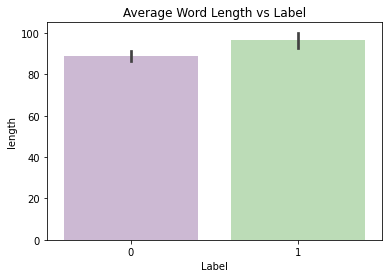

In [13]:
#Exploratory Data Analysis
df_tw['length'] = df_tw['Tweet'].apply(len)
fig1 = sns.barplot('Label','length',data = df_tw,palette='PRGn')
plt.title('Average Word Length vs Label')
plot = fig1.get_figure()
plot.savefig('Barplot.png')

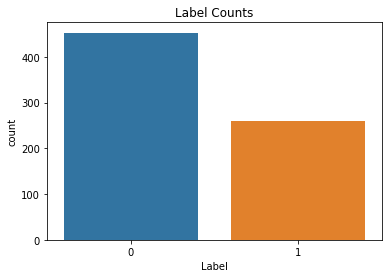

In [14]:
#bar graph to count positive negative label
fig2 = sns.countplot(x= 'Label',data = df_tw)
plt.title('Label Counts')
plot = fig2.get_figure()
plot.savefig('Count Plot.png')

In [15]:
df_tw['cleaned_tweet'] = df_tw.Tweet.apply(lambda x: ' '.join([word for word in x.split() if not word.startswith('@')]))

Normal words secara keseluruhan berisi debat pilkada, jakarta, dan ahok


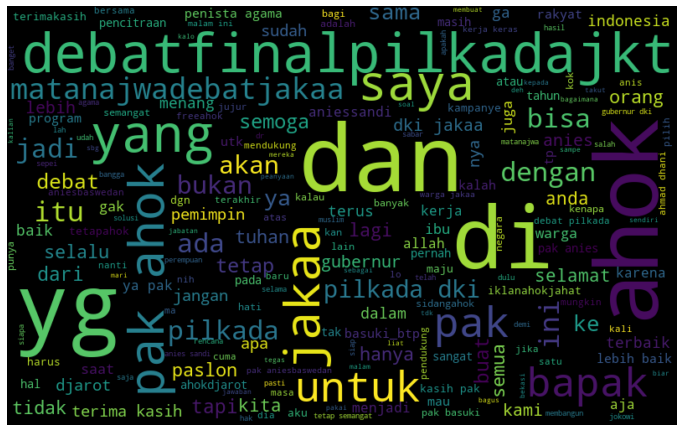

In [45]:
#word cloud to show overall data tweet
normal_words = ' '.join([word for word in df_tw['cleaned_tweet'][df_tw['Label'] == 0]])
wordcloud = WordCloud(width = 800, height = 500, max_font_size = 110).generate(normal_words)
print('Normal words secara keseluruhan berisi debat pilkada, jakarta, dan ahok')
plt.figure(figsize= (12,8))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

Negative words secara keseluruhan berisi rasisme, dan agama


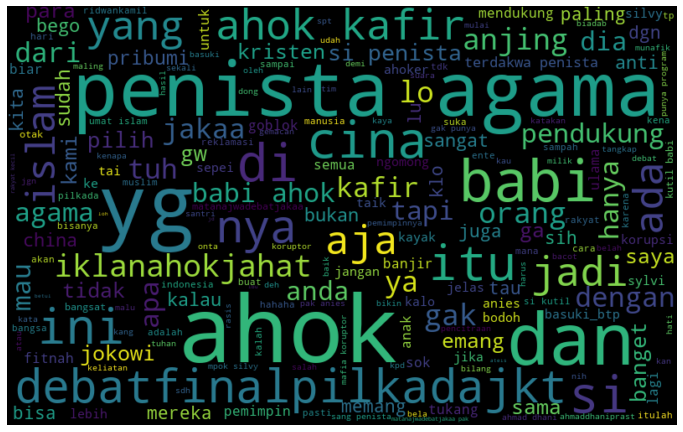

In [46]:
negative_words = ' '.join([word for word in df_tw['cleaned_tweet'][df_tw['Label'] == 1]])
wordcloud = WordCloud(width = 800, height = 500, max_font_size = 110).generate(negative_words)
print('Negative words secara keseluruhan berisi rasisme, dan agama')
plt.figure(figsize= (12,8))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

## Split Data



In [47]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df_tw["Tweet"], df_tw["Label"], test_size = 0.2, random_state = 42)

In [48]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
count_vect = CountVectorizer(stop_words='english')
transformer = TfidfTransformer(norm='l2',sublinear_tf=True)

In [49]:
x_train_counts = count_vect.fit_transform(x_train)
x_train_tfidf = transformer.fit_transform(x_train_counts)

In [50]:
print(x_train_counts.shape)
print(x_train_tfidf.shape)

(570, 2675)
(570, 2675)


In [51]:
x_train_counts

<570x2675 sparse matrix of type '<class 'numpy.int64'>'
	with 7328 stored elements in Compressed Sparse Row format>

In [52]:
x_test_counts = count_vect.transform(x_test)
x_test_tfidf = transformer.transform(x_test_counts)

In [53]:
print(x_test_counts.shape)
print(x_test_tfidf.shape)

(143, 2675)
(143, 2675)


##Modeling

In [54]:
#With Random Forest
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=500)
model.fit(x_train_tfidf,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [55]:
#save prediction
predictions = model.predict(x_test_tfidf)

In [56]:
#confussion matrix
from sklearn.metrics import confusion_matrix,f1_score
confusion_matrix(y_test,predictions)

array([[93,  5],
       [12, 33]])

In [58]:
#accuracy Random Forest
acc_rf=f1_score(y_test,predictions)
acc_rf

0.7951807228915663

In [59]:
from sklearn import svm
lin_clf = svm.LinearSVC()
lin_clf.fit(x_train_tfidf,y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [60]:
predict_svm = lin_clf.predict(x_test_tfidf)

In [61]:
from sklearn.metrics import confusion_matrix,f1_score
confusion_matrix(y_test,predict_svm)

array([[93,  5],
       [ 9, 36]])

In [62]:
acc_svm=f1_score(y_test,predict_svm)
acc_svm

0.8372093023255814

## Conclusion

From the process, it can be concluded that the tweets of Twitter users contain the final debate on Pilkada Jakarta which contains hate speech related to racism and religion. The model is successful in predicting hate speech with the Random Forest and SVM algorithms. The results of the SVM algorithm have a higher prediction than Random Forest.